Встановлюємо необхідні бібліотеки. Визначаємо нашу функцію. Нарізаємо вузли та дещо змінимо інтервал, оскільки у нашій функції присутній ln(x), у якому х має бути більше 0. Беремо інтервал [0.1, 0.8]

In [115]:
import numpy as np
import sympy as sp
import seaborn as sns
import pandas as pd
sns.set_style('darkgrid')

#1
def func(x):
    return x * np.log(x) - 100
X = np.linspace(0.1, 0.8, 8) # дещо змінюємо інтервал
df = pd.DataFrame({'Точки': list(X), 'Значення функції': list(func(X))})
df

,Точки,Значення функції
0,0.1,-100.230259
1,0.2,-100.321888
2,0.3,-100.361192
3,0.4,-100.366516
4,0.5,-100.346574
5,0.6,-100.306495
6,0.7,-100.249672
7,0.8,-100.178515


Будуємо графік функції на інтервалі

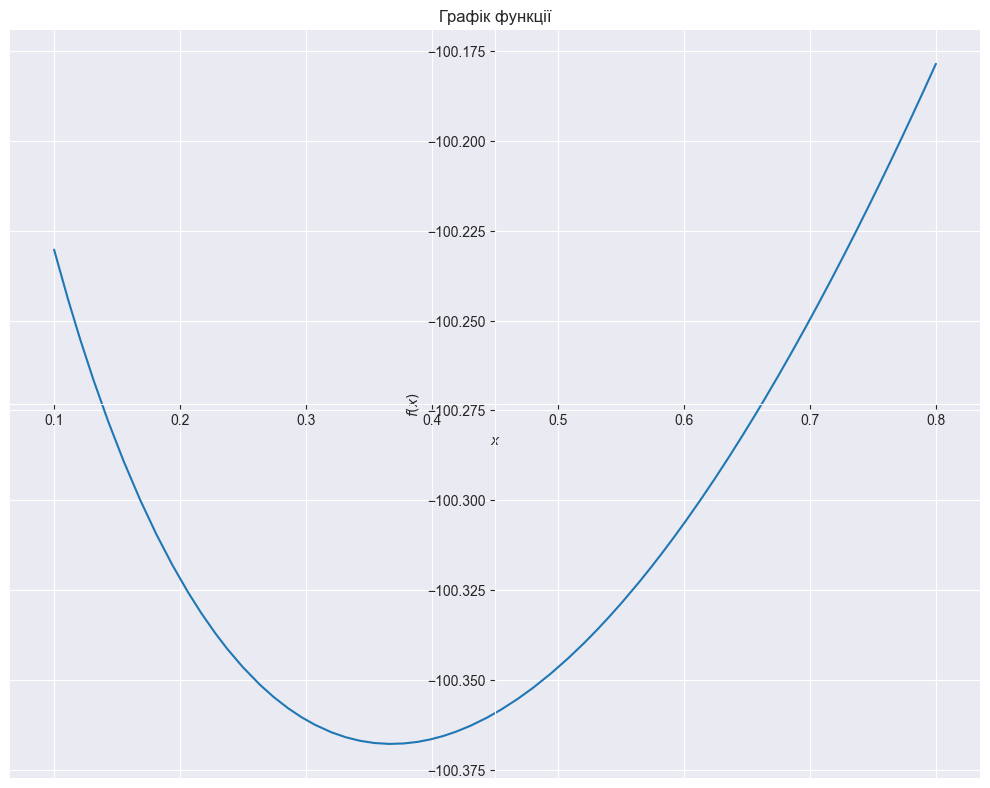

In [116]:
x = sp.Symbol('x')
sfunc = x * sp.log(x) - 100
p = sp.plot(sfunc, (x, 0.1, 0.8), title='Графік функції', size=(10, 8))#x>0

Піднімемо нашу функцію на 101 вгору для того, щоб вона була додатньо визначена на інтервалі. Знаходимо значення нової функції і будуємо її графік.

   Точки   Значення функції
0    0.1  0.769741490700595
1    0.2  0.678112417513180
2    0.3  0.638808158702219
3    0.4  0.633483707250338
4    0.5  0.653426409720027
5    0.6  0.693504625740406
6    0.7  0.750327539242887
7    0.8  0.821485158948632


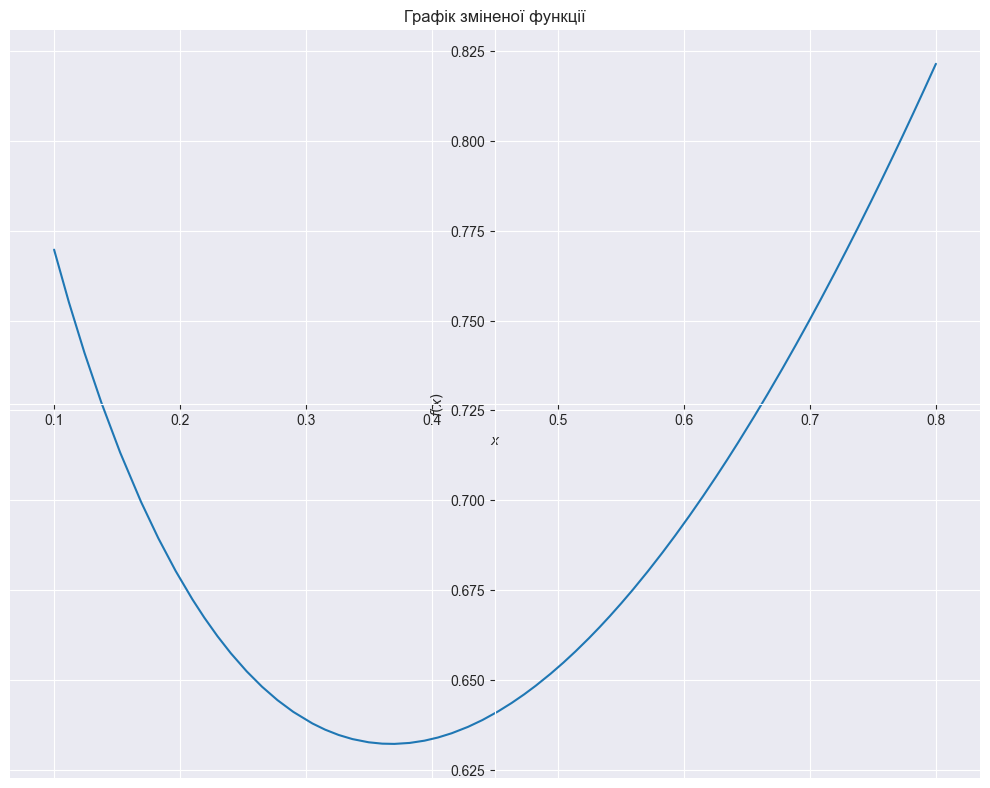

In [117]:
sfunc = x * sp.log(x) + 1 # підняти на 101
df1 = pd.DataFrame({'Точки': list(X), 'Значення функції': [sfunc.subs(x, i) for i in X]})
print(df1)
p1 = sp.plot(sfunc, (x, 0.1, 0.8), title='Графік зміненої функції', size=(10, 8), show=False)#x>0
p1.show()

Наша функція має першу похідну: ln(x) + 1
Відповідно друга похідна: 1/x
Визначимо еталонні значення за допомогою вбудованої функції для полегшення перевірки подальших обчислень.

In [118]:
#Значення похідних
diff_1_values = np.array([sp.diff(sfunc, x).subs(x, i) for i in X]).reshape(len(X), 1)
diff_2_values = np.array([sp.diff(sfunc, x, 2).subs(x, i) for i in X]).reshape(len(X), 1)
df2 = pd.DataFrame({'Значення 1 похідної у точках': list(diff_1_values), 'Значення 2 похідної у точках': list(diff_2_values)}, index=list(X))
df2

,Значення 1 похідної у точках,Значення 2 похідної у точках
0.1,[-1.30258509299405],[10.0000000000000]
0.2,[-0.609437912434100],[5.00000000000000]
0.3,[-0.203972804325936],[3.33333333333333]
0.4,[0.0837092681258450],[2.50000000000000]
0.5,[0.306852819440055],[2.00000000000000]
0.6,[0.489174376234009],[1.66666666666667]
0.7,[0.643325056061268],[1.42857142857143]
0.8,[0.776856448685790],[1.25000000000000]


Скористаємося різницевими схемами для знаходження значень 1ої та 2ої похідної функції на нашому інтервалі. Визначимо також відносну похибку формул і доцільність використання. Отримані значення зведемо у таблицю.

In [119]:
#Несиметричні обернені
#1 похідна
n = len(X)
h = 0.1
y = [sfunc.subs(x, i) for i in X]
df1_asym_back = np.zeros(n)
print("Несиметрична обернена формула" '\nПерша похідна')
for i in reversed(range(1, n)):
    df1_asym_back[n - i] = (y[i] - y[i - 1])/h
delta1_asym_back = np.zeros(n) # Відносна похибка для 1 похідної
for j in range(n):
    delta1_asym_back[j] = (abs(df1_asym_back[j] - diff_1_values[-j]))/diff_1_values[-j]
df_df_1_asym_back = pd.DataFrame({'Значення': list(df1_asym_back), '\u03B4': list(abs(delta1_asym_back)), 'Еталонні рішення' : reversed(list(diff_1_values))}, index=list(X))
print(df_df_1_asym_back.drop(0.1))
delta1 = sum(delta1_asym_back)/(n-1)
print(f'Середнє значення \u03B4 = {abs(delta1)}')
#2 похідна
df2_asym_back = np.zeros(n) # Відносна похибка для 2 похідної
print("Друга похідна:")
for j in reversed(range(2, n)):
    df2_asym_back[n - j] = (y[j] - 2 * y[j - 1] + y[j - 2])/(h**2)
delta2_asym_back = np.zeros(n)
for j in range(1, n):
    delta2_asym_back[j] = (abs(np.flip(df2_asym_back, 0)[j] - diff_2_values[j]))/diff_2_values[j]
df_df_2_asym_back = pd.DataFrame({'Значення': reversed(list(df2_asym_back)), '\u03B4': list(abs(delta2_asym_back)), 'Еталонні рішення' : list(diff_2_values)}, index=list(X))
print(df_df_2_asym_back.drop(0.1).drop(0.8))
delta2 = sum(delta1_asym_back)/(n-2)
print(f'Середня значення \u03B4 = {abs(delta2)}')

Несиметрична обернена формула
Перша похідна
     Значення         δ      Еталонні рішення
0.2  0.711576  0.084031   [0.643325056061268]
0.3  0.568229  0.116731   [0.489174376234009]
0.4  0.400782  0.180697   [0.306852819440055]
0.5  0.199427  0.350089  [0.0837092681258450]
0.6 -0.053245  1.636065  [-0.203972804325936]
0.7 -0.393043  0.926936  [-0.609437912434100]
0.8 -0.916291  0.503501   [-1.30258509299405]
Середнє значення δ = 0.00897498733528655
Друга похідна:
     Значення         δ    Еталонні рішення
0.2  5.232481  0.046496  [5.00000000000000]
0.3  3.397981  0.019394  [3.33333333333333]
0.4  2.526715  0.010686  [2.50000000000000]
0.5  2.013551  0.006776  [2.00000000000000]
0.6  1.674470  0.004682  [1.66666666666667]
0.7  1.433471  0.003429  [1.42857142857143]
Середня значення δ = 0.010470818557834308


In [120]:
#Несиметричні прямі
#1 похідна
print("Несиметрична пряма формула: \nПерша похідна")
df1_asym_forw = np.zeros(n-1)
for i in range(n-1):
    df1_asym_forw[i] = (y[i+1] - y[i])/h #визначаємо значення 1 похідної
delta1_asym_forw = np.zeros(n)
for j in range(n-1):
    delta1_asym_forw[j] = (abs(df1_asym_forw[j] - diff_1_values[j]))/diff_1_values[j] #визначаємо значення похибки
df_df_1_asym_forw = pd.DataFrame({'Значення': list(df1_asym_forw), '\u03B4': list(abs(delta1_asym_forw))[:7], 'Еталонні рішення': list(diff_1_values)[:7]}, index=X[:7])
print(df_df_1_asym_forw)
delta3 = sum(delta1_asym_forw)/(n-1) #середня похибка
print(f'Середня значення \u03B4 = {delta3}')
#2 похідна
df2_asym_forw = np.zeros(n-2)
for i in range(n-2):
    df2_asym_forw[i] = (y[i+2] - 2*y[i+1] + y[i])/(h**2) #визначаємо значення 2 похідної
delta2_asym_forw = np.zeros(n-2)
for j in range(n-2):
    delta2_asym_forw[j] = (abs(df2_asym_forw[j] - diff_2_values[j]))/diff_2_values[j] #визначаємо значення похибки
print('Друга похідна')
df_df_2_asym_forw = pd.DataFrame({'Значення': list(df2_asym_forw), '\u03B4': list(abs(delta2_asym_forw)), 'Еталонні рішення': list(diff_2_values)[1:7]}, index=list(X)[1:7])
print(df_df_2_asym_forw)
delta4 = sum(delta2_asym_forw)/6 #середня похибка
print(f'Середня значення \u03B4 = {delta4}')

Несиметрична пряма формула: 
Перша похідна
     Значення         δ      Еталонні рішення
0.1 -0.916291  0.296560   [-1.30258509299405]
0.2 -0.393043  0.355074  [-0.609437912434100]
0.3 -0.053245  0.738963  [-0.203972804325936]
0.4  0.199427  1.382377  [0.0837092681258450]
0.5  0.400782  0.306106   [0.306852819440055]
0.6  0.568229  0.161609   [0.489174376234009]
0.7  0.711576  0.106091   [0.643325056061268]
Середня значення δ = 0.08079801035075118
Друга похідна
     Значення         δ    Еталонні рішення
0.2  5.232481  0.476752  [5.00000000000000]
0.3  3.397981  0.320404  [3.33333333333333]
0.4  2.526715  0.241985  [2.50000000000000]
0.5  2.013551  0.194579  [2.00000000000000]
0.6  1.674470  0.162765  [1.66666666666667]
0.7  1.433471  0.139918  [1.42857142857143]
Середня значення δ = 0.25606721717970476


In [121]:
#Симетричні формули
#1 похідна
print('Симетрична формула \nПерша похідна:')
df1_sym = np.zeros(n-2)
for i in range(1, n-1):
    df1_sym[i - 1] = (y[i + 1] - y[i - 1])/(2*h) #визначаємо значення 1 похідної
delta1_sym = np.zeros(n-2)
for j in range(n-2):
    delta1_sym[j] = (abs(df1_sym[j] - diff_1_values[j+1]))/diff_1_values[j+1] #визначаємо значення похибки
df_df_1_sym = pd.DataFrame({'Значення': list(df1_sym), '\u03B4': list(abs(delta1_sym)), 'Еталонні рішення': list(diff_1_values)[1:7]}, index=list(X)[1:7])
print(df_df_1_sym)
delta5 = sum(delta1_sym)/6 #середня похибка
print(f'Середнє значення \u03B4 = {abs(delta5)}')
#2 похідна
print('Друга похідна:')
df2_sym = np.zeros(n-2)
for i in range(1, n - 1):
    df2_sym[i - 1] = (y[i + 1] - 2*y[i] + y[i - 1])/(h*h) #визначаємо значення 2 похідної
delta2_sym = np.zeros(n-2)
for j in range(n-2):
    delta2_sym[j] = (abs(df2_sym[j] - diff_2_values[j+1]))/diff_2_values[j+1] #визначаємо значення похибки
df_df_2_sym = pd.DataFrame({'Значення': list(df2_sym), '\u03B4': list(abs(delta2_sym)), 'Еталонні рішення': list(diff_2_values)[1:7]}, index=list(X)[1:7])
print(df_df_2_sym)
delta6 = sum(delta2_sym)/6 #середня похибка
print(f'Середнє значення \u03B4 = {abs(delta6)}')

Симетрична формула 
Перша похідна:
     Значення         δ      Еталонні рішення
0.2 -0.654667  0.074214  [-0.609437912434100]
0.3 -0.223144  0.093987  [-0.203972804325936]
0.4  0.073091  0.126844  [0.0837092681258450]
0.5  0.300105  0.021992   [0.306852819440055]
0.6  0.484506  0.009544   [0.489174376234009]
0.7  0.639903  0.005320   [0.643325056061268]
Середнє значення δ = 0.0007501721758548955
Друга похідна:
     Значення         δ    Еталонні рішення
0.2  5.232481  0.046496  [5.00000000000000]
0.3  3.397981  0.019394  [3.33333333333333]
0.4  2.526715  0.010686  [2.50000000000000]
0.5  2.013551  0.006776  [2.00000000000000]
0.6  1.674470  0.004682  [1.66666666666667]
0.7  1.433471  0.003429  [1.42857142857143]
Середнє значення δ = 0.015243937642229394


Отже, як бачимо, найменше значення похибки має симетрична формула.

Запишемо поліном Лагранжа, у такому самому вигляді, як і в попередній роботі. Побудуємо його графік, знайдемо похідні, обчислимо відносну похибку. Так само зведемо усі дані в таблицю для зручності.

In [122]:
pol = 0
for i in range(len(X)):
    num = sp.prod([(sp.Symbol('x') - X[j])/(X[i] - X[j]) for j in range(len(X)) if j != i])
    pol += y[i]*num
print(f'Поліном Лагранжа: \n{sp.expand(pol)}')

Поліном Лагранжа: 
-6.21222717684577*x**7 + 23.2430579686188*x**6 - 37.3286812047882*x**5 + 33.9890598450438*x**4 - 19.8612886777555*x**3 + 8.75572434231071*x**2 - 2.56068898673425*x + 0.955066193620986


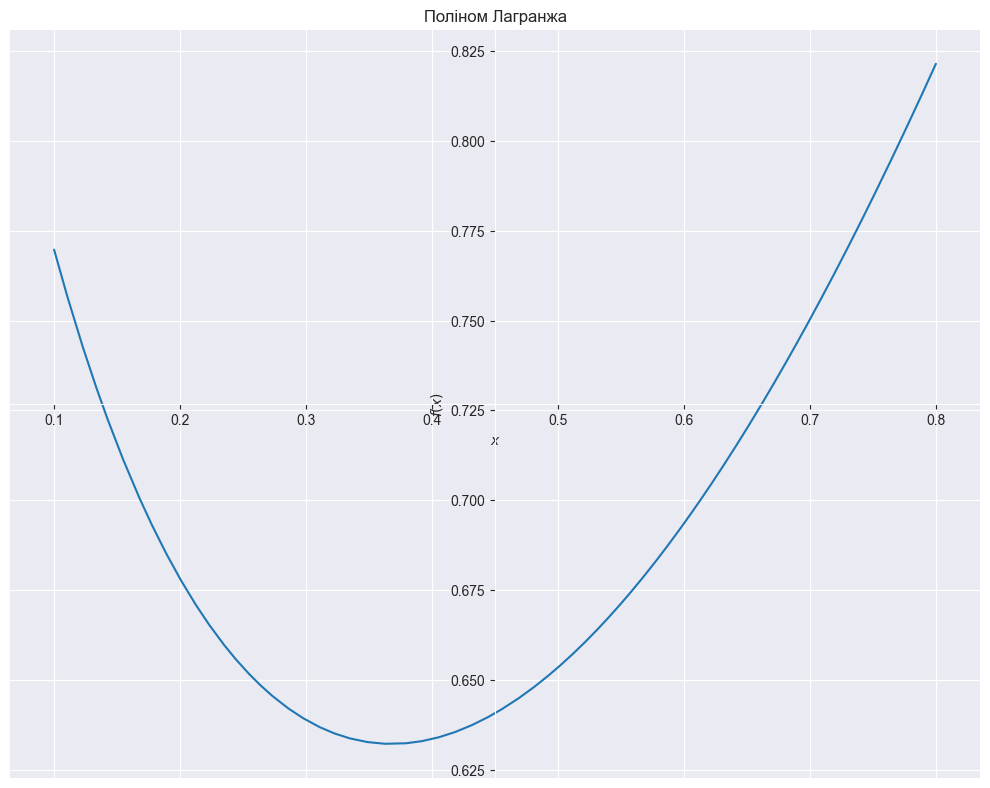

In [123]:
#Будуємо графік полінома
lgr_plt = sp.plot(pol, (x, 0.1, 0.8), show=False, size=(10, 8), title='Поліном Лагранжа')
lgr_plt.show()

In [124]:
# Обчислимо значення 1 похідної поліному у вузлах і знайдемо відносну похибку
dv1_lgr = pol.diff(x)
dv1_lgr_vals = np.array([dv1_lgr.subs(x, i) for i in X]).reshape(n, 1)
print(f"\u03B4 = {abs(np.sum(abs(dv1_lgr_vals - diff_1_values)/diff_1_values)/n)}")
df_lgr = pd.DataFrame({'Значення': list(dv1_lgr_vals), 'Еталонні рішення': list(diff_1_values)}, index=list(X))
print(df_lgr)

δ = 0.00102046171915874
                 Значення      Еталонні рішення
0.1   [-1.28673978193934]   [-1.30258509299405]
0.2  [-0.610889832212226]  [-0.609437912434100]
0.3  [-0.203612659968853]  [-0.203972804325936]
0.4  [0.0835365518948015]  [0.0837092681258450]
0.5   [0.306996914948784]   [0.306852819440055]
0.6   [0.488968165203781]   [0.489174376234009]
0.7   [0.643867368114650]   [0.643325056061268]
0.8   [0.773475998612527]   [0.776856448685790]


In [125]:
# Обчислимо значення 2 похідної поліному у вузлах і знайдемо відносну похибку
dv2_lgr = pol.diff(x, 2)
dv2_lgr_vals = np.array([dv2_lgr.subs(x, i) for i in X]).reshape(n, 1)
print(f"\u03B4 = {abs(np.sum(abs(dv1_lgr_vals - diff_2_values)/diff_2_values)/n)}")
df2_lgr = pd.DataFrame({'Значення': list(dv2_lgr_vals), 'Еталонні рішення': list(diff_2_values)}, index=list(X))
print(df2_lgr)

δ = 0.845269226087772
               Значення    Еталонні рішення
0.1  [8.99390907377194]  [10.0000000000000]
0.2  [5.05223645342277]  [5.00000000000000]
0.3  [3.32586902746019]  [3.33333333333333]
0.4  [2.50155267410067]  [2.50000000000000]
0.5  [2.00024469616287]  [2.00000000000000]
0.6  [1.66401757135645]  [1.66666666666667]
0.7  [1.44296270256970]  [1.42857142857143]
0.8  [1.08209416815384]  [1.25000000000000]


Складемо програми для чисельного інтегрування за методом середніх прямокутників, трапецій і Ньютона.

In [126]:
#Метод середніх прямокутників
print('Метод середніх прямокутників')
ref = sp.integrate(sfunc, (x, 0.1, 0.8))
print(f'Еталонне рішення: {ref}')
h = 0.1 #крок інтегрування
n = sp.ceiling(0.7/h) #(a-b)/h - кіл-ть кроків інтегрування
print(f'Число кроків інтегрування = {n}')
J = h * sum([sfunc.subs(x, 0.1 + h*(i-0.5)) for i in range(1, n)])
print(f'J = {J}')
#Як бачимо, результати розрахунків практично не відрізняються. Визначимо похибку за правилом Рунге. Для цього обчислимо інтеграл з кроком h і збільшимо вдвічі число точок:
h1 = h/2
n = sp.ceiling(0.7/h1) # (a-b)/h1
print(n)
print(f'Збільшене число кроків інтегрування = {n}')
J1 = h1 * sum([sfunc.subs(x, 0.1 + h1*(i-0.5)) for i in range(1, n)])
print(f'J_1 = {J1}')
r = J - J1
print(f'Вбудоване рішення = {ref}')
print(f'Похибка, знайдена за правилом Рунге = {r}')

Метод середніх прямокутників
Еталонне рішення: 0.482606989044423
Число кроків інтегрування = 7
J = 0.403327295923892
14
Збільшене число кроків інтегрування = 14
J_1 = 0.442268175989786
Вбудоване рішення = 0.482606989044423
Похибка, знайдена за правилом Рунге = -0.0389408800658939


Як можна було помітити, для методу трапецій результат досить суттєво відхилявся від еталонного рішення. Тож знайдемо кіл-ть кроків інтегрування необхідну для точності 0.001.

In [135]:
#Метод трапецій
J = ref
y0 = sfunc.subs(x, 0.1)
yn = sfunc.subs(x, 0.8)
eps = 1
i = 0
h_mas = []
J_mas = []
while eps > 0.001:
    h = (0.7)/2**i
    h_mas.append(h)
    Ji = (h/2)*(y0 + yn + 2*sum([sfunc.subs(x, 0.1 + h*j) for j in range(1, 2**i)]))
    J_mas.append(Ji)
    eps = abs((J - Ji)/J)
    print(f"n = {2**i}; J = {Ji}; \u03B5 = {eps}")
    i += 1
print(f"Результат: {J_mas[4]}")
print(f"Вбудоване рішення: {ref}")

n = 1; J = 0.556929327377230; ε = 0.154001786173812
n = 2; J = 0.502699701534316; ε = 0.0416336956281487
n = 4; J = 0.487814590092594; ε = 0.0107905628521503
n = 8; J = 0.483926383724650; ε = 0.00273389053656202
n = 16; J = 0.482938182697919; ε = 0.000686259546616998
Результат: 0.482938182697919
Вбудоване рішення: 0.482606989044423


In [128]:
#Метод Ньютона-Котеса
def newton_method (h, X, f):
    p_data = {
        1: [0.5, 1, 1],
        2: [1/3, 1, 4, 1],
        3: [3/8, 1, 3, 3, 1],
        4: [2/45, 7, 32, 12, 32, 7],
        5: [5/288, 19, 75, 50, 50, 75, 19]
    }
    n = len(X)
    return h*p_data[4][0]*sum([p_data[4][i + 1]*f.subs(x, X[i]) for i in range(n)])
# Візьмемо порядок р = 4
h = 0.1
X = [0.2, 0.3, 0.4, 0.5, 0.6]
newton_solution_p4 = newton_method(h, X, sfunc)
print(f"Метод Ньютона: {newton_solution_p4}")
print(f"Вбудована функція: {sp.integrate(sfunc, (x, 0.2, 0.6))}")

Метод Ньютона: 0.260242799907960
Вбудована функція: 0.260240145970804


Визначимо похибку отриманого результата за залишковим членом, за
правилом Рунге і за допомогою екстраполяції Річардсона

In [129]:
#Похибки за залишковим членом
dv2 = 1/x
M2 = abs(dv2.subs(x, .8))
R_msqr = (h**2*(0.7)*M2)/24
print(f"Формула середніх прямокутників R(х) = {R_msqr}")
R_trap = (h**2*(0.7)*M2)/12
print(f'Формула трапецій R(f) = {R_trap}')
R_Newton = (h**4*(0.7)*M2)/80
print(f'Формула Ньютона R(f) = {R_Newton}')

Формула середніх прямокутників R(х) = 0.000364583333333333
Формула трапецій R(f) = 0.000729166666666667
Формула Ньютона R(f) = 0.00000109375000000000


In [130]:
#Правило Рунге
j = 2
teta = 1/(pow(2, j) - 1)
delta7 = teta*(J_mas[3] - J_mas[2])
print(f"Для формули трапецій \u0394 = {delta7}")

Для формули трапецій Δ = -0.00129606878931454


In [131]:
#Екстраполяція Річардсона
p = 2
delta8 = 1/(pow(h_mas[2]/h_mas[3], p) - 1)*(J_mas[3] - J_mas[2])
print(f"\u0394 = {delta8}")

Δ = -0.00129606878931454


Використовуючи рекурентний алгоритм, отримаємо декілька наближень
для заданого інтеграла.

In [132]:
res = (4*J_mas[3] - J_mas[2])/3
print(f"Результат використання методу трапецій: {J_mas[3]}")
print(f"За рекурентною формулою Сімпсона: {res}")
print(f"Вбудоване рішення: {ref}")

Результат використання методу трапецій: 0.483926383724650
За рекурентною формулою Сімпсона: 0.482630314935336
Вбудоване рішення: 0.482606989044423
